In [1]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from influenza_USA.NC_forecasts.utils import get_NC_influenza_data

In [2]:
# settings
start_visualisation_month = 9
end_visualisation_month = 6
seasons = ['2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2023-2024']

# x-axis shen|anigans
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun"]
month_ticks = [0, 30, 61, 91, 123, 154, 184, 215, 245, 275]  # Approx days since Sept 1
props = dict(boxstyle='round', facecolor='white', alpha=1)

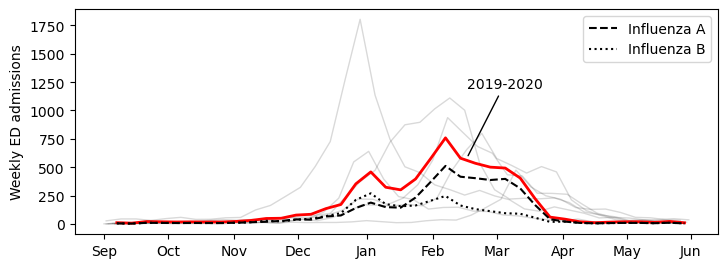

In [5]:
# settings
subtypes = True
highlight = True
highlight_season='2019-2020'
annotation_locations = {
    '2014-2015': {'xy': (115, 550), 'xytext': (60, 1100)},
    '2015-2016': {'xy': (195, 550), 'xytext': (180, 1100)},
    '2016-2017': {'xy': (190, 550), 'xytext': (180, 1100)},
    '2017-2018': {'xy': (170, 1000), 'xytext': (170, 1500)},
    '2018-2019': {'xy': (170, 850), 'xytext': (170, 1200)},
    '2019-2020': {'xy': (170, 580), 'xytext': (170, 1200)},
    '2023-2024': {'xy': (135, 900), 'xytext': (150, 1500)},
}

# make figure
fig,ax=plt.subplots(figsize=(8.3, 11.7/4))
for season in seasons:
    # get data
    df = 7*get_NC_influenza_data(datetime(int(season[0:4]), start_visualisation_month, 1), datetime(int(season[0:4])+1, end_visualisation_month, 1), season)
    if ((season == highlight_season) & (highlight == True)):
        # highlight flu season and annotate
        ax.plot((df.index - datetime(int(season[0:4]), start_visualisation_month, 1))/timedelta(days=1), df['H_inc'], color='red', linewidth=2)
        ax.annotate(
            highlight_season, 
            xy = annotation_locations[highlight_season]['xy'], # Coordinates of the point to annotate
            xytext = annotation_locations[highlight_season]['xytext'], # Position of the text
            arrowprops=dict(arrowstyle='-') # Optional arrow properties
        )
        # plot subtypes
        if subtypes == True:
            ax.plot((df.index - datetime(int(season[0:4]), start_visualisation_month, 1))/timedelta(days=1), df['H_inc_A'], linestyle='--', color='black', label='Influenza A')
            ax.plot((df.index - datetime(int(season[0:4]), start_visualisation_month, 1))/timedelta(days=1), df['H_inc_B'], linestyle=':', color='black', label='Influenza B') 
            ax.legend()
    else:
        if highlight == False:
            alpha=1
            # state
            ax.text(0.02, 0.95, 'North Carolina', transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=1))
        else:
            alpha=0.15
        # plot total hospitalisations
        ax.plot((df.index - datetime(int(season[0:4]), start_visualisation_month, 1))/timedelta(days=1), df['H_inc'], color='black', alpha=alpha, linewidth=1)
        
ax.set_ylabel('Weekly ED admissions')
ax.set_xticks(month_ticks)  # Set tick positions
ax.set_xticklabels(months)  # Set month labels
plt.show()
plt.close()